## EJERCICIO MÓDULO 3 - PANDAS, SEABORN Y PLOTLY

In [1]:
#Carga de librerias

import pandas as pd
import matplotlib as pl
import matplotlib.pyplot as plt
import seaborn  as sns
from numpy import random    
import numpy as np
import plotly.express as px 
import nbformat 

In [2]:
# Chequeo de versiones

print('Pandas version: ', pd.__version__)
print('Seaborn version: ', sns.__version__)
print('Numpy version: ', np.__version__)
print('Nbformat version: ', nbformat.__version__)


Pandas version:  2.2.3
Seaborn version:  0.13.2
Numpy version:  2.0.2
Nbformat version:  5.10.4


### 1.- Carga y limpieza de DataFrame diamonds.csv

##### a.- Carga y comprobación

In [3]:
df= pd.read_csv("diamonds.csv")

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.2,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.shape

(53940, 10)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53939.0,0.797946,0.474013,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53938.0,57.457145,2.234521,43.0,56.00,57.00,59.00,95.00
y,53939.0,5.734479,1.142092,0.0,4.72,5.71,6.54,58.90
z,53939.0,3.538722,0.705700,0.0,2.91,3.53,4.04,31.80


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53939 non-null  float64
 1   cut      53937 non-null  object 
 2   color    53938 non-null  object 
 3   clarity  53938 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53938 non-null  float64
 6   price    53938 non-null  object 
 7   x        53938 non-null  object 
 8   y        53939 non-null  float64
 9   z        53939 non-null  float64
dtypes: float64(5), object(5)
memory usage: 4.1+ MB


##### b.- Limpieza de datos

In [8]:
#df.isna().sum() #ambos metodos son equivalentes
df.isnull().sum()

carat      1
cut        3
color      2
clarity    2
depth      0
table      2
price      2
x          2
y          1
z          1
dtype: int64

In [9]:
df[df.isnull().any(axis=1)]


,carat,cut,color,clarity,depth,table,price,x,y,z
14432,1.20,NaN,G,SI2,61.1,57.0,5826,6.86,6.83,4.18
14437,1.00,Good,F,NaN,64.8,59.0,5829,6.17,6.23,4.02
14445,1.22,Premium,I,VS2,62.3,NaN,5832,6.79,6.83,4.24
14446,1.01,Ideal,D,SI1,62.0,57.0,5832,NaN,6.44,3.97
14459,1.24,Very Good,I,VS2,62.7,55.0,NaN,6.82,6.87,4.29
14466,1.01,Very Good,G,NaN,61.6,56.0,5839,6.4,6.46,3.96
14468,1.08,NaN,H,VS2,62.1,56.0,5839,6.59,6.56,4.08
14470,1.00,Fair,F,VS2,64.9,56.0,5840,NaN,6.31,4.08
14472,1.23,Premium,F,SI2,59.9,58.0,5841,7.02,6.96,NaN
27249,2.02,Very Good,F,SI1,60.1,60.0,NaN,8.21,NaN,4.96


############################################

In [10]:
# busqueda de interrogantes, valores str, previo a la conversión a float para, posteriormente, obtener la 
# media o moda y reemplazar los valores faltantes (NaN) en el dataframe.

interrogacion = df.map(lambda x: '?' in str(x)).sum()

print(interrogacion)


carat      0
cut        1
color      1
clarity    0
depth      0
table      0
price      1
x          1
y          0
z          0
dtype: int64


In [11]:
df.replace('?', np.nan, inplace=True)


In [12]:
interrogacion= df.map(lambda x: '?' in str(x)).sum()

print(interrogacion)

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [13]:
# Ya no hay interrogantes en el dataframe 👆

############################################

In [14]:
# Busqueda de valores iguales a 0.

df['x'] = pd.to_numeric(df['x'], errors='coerce')
ceros_x = df[df['x'] == 0].shape[0]
print(f"Cantidad de valores iguales a 0: {ceros_x}")

Cantidad de valores iguales a 0: 8


In [15]:
ceros_y = df['y'].map(lambda x: x==0).sum()
print(f"Cantidad de valores iguales a 0: {ceros_y}")

Cantidad de valores iguales a 0: 7


In [16]:
ceros_z = df[(df['z'] == 0) | (df['z'] == '0')].shape[0]
print(f"Cantidad de valores iguales a 0: {ceros_z}")

Cantidad de valores iguales a 0: 20


In [17]:
# Susutitucion por valores NaN.

df.loc[df['x'] == 0, 'x'] = np.nan
df.loc[df['y'] == 0, 'y'] = np.nan
df.loc[df['z'] == 0, 'z'] = np.nan

In [18]:
#buscamos los NaN de nuevo y comprobamos que en las columnas  hay más valores NaN más que el la busqueda 
# inicial de NaN's por lo que deducimos que se han convertido correctamente los inetrrogantes y los 0 en NaN's:

df.isna().sum()

carat       1
cut         4
color       3
clarity     2
depth       0
table       2
price       3
x          11
y           8
z          21
dtype: int64

In [19]:
df[df.isnull().any(axis=1)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,NaN
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,NaN
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,NaN
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,NaN
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,NaN
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,NaN,6.62,NaN
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,NaN,NaN,NaN
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,NaN
14432,1.20,NaN,G,SI2,61.1,57.0,5826,6.86,6.83,4.18
14437,1.00,Good,F,NaN,64.8,59.0,5829,6.17,6.23,4.02


##### c.- Cambio tipo de datos

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53939 non-null  float64
 1   cut      53936 non-null  object 
 2   color    53937 non-null  object 
 3   clarity  53938 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53938 non-null  float64
 6   price    53937 non-null  object 
 7   x        53929 non-null  float64
 8   y        53932 non-null  float64
 9   z        53919 non-null  float64
dtypes: float64(6), object(4)
memory usage: 4.1+ MB


In [21]:
# Cambiamos los tipos de datos a los indicados.

df ['carat']= df['carat'].astype("float32")
df ['cut']= df['cut'].astype("category")
df ['color']= df['color'].astype("category")
df ['clarity']= df['clarity'].astype("category")
df ['depth']= df['depth'].astype("float32")
df ['table']= df['table'].astype("float32")
df ['price']= df['price'].astype("float32")
df ['x']= df['x'].astype("float32")
df ['y']= df['y'].astype("float32")
df ['z']= df['z'].astype("float32")
    

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53939 non-null  float32 
 1   cut      53936 non-null  category
 2   color    53937 non-null  category
 3   clarity  53938 non-null  category
 4   depth    53940 non-null  float32 
 5   table    53938 non-null  float32 
 6   price    53937 non-null  float32 
 7   x        53929 non-null  float32 
 8   y        53932 non-null  float32 
 9   z        53919 non-null  float32 
dtypes: category(3), float32(7)
memory usage: 1.6 MB


##### d.- Sustitución de valores faltantes (Nan's)

In [23]:
# ahí siguen los Nan's

df.isna().sum()

carat       1
cut         4
color       3
clarity     2
depth       0
table       2
price       3
x          11
y           8
z          21
dtype: int64

In [24]:
# Hay Nan's en todas las columnas excepto en depth por lo que porcedemos a hayar media (en columnas float) o moda (en columnas categoría) para reemplazarlos.


df['carat']= df['carat'].fillna(df['carat'].mean())
df['cut']= df['cut'].fillna(df['cut'].mode()[0])  #En las modas ponemos [0] para que recupere el valor moda que aparezca en primer lugar si es que hay varios valores que sean modas
df['color']= df['color'].fillna(df['color'].mode()[0])
df['clarity']= df['clarity'].fillna(df['clarity'].mode()[0])
df['table']=df['table'].fillna(df['table'].mean())
df['price']= df['price'].fillna(df['price'].median())
df['x']= df['x'].fillna(df['x'].mean())
df['y']= df['y'].fillna(df['y'].mean())
df['z']= df['z'].fillna(df['z'].mean())


In [25]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [26]:
# Ya no hay Nan's en el dataframe 👏🎉

In [27]:
# Eliminacion duplicados.

df.duplicated().sum()

np.int64(146)

In [28]:
df.drop_duplicates(inplace=True)

In [29]:
df.duplicated().sum()

np.int64(0)

In [30]:
# Ya no hay duplicados en el dataframe 👊💥

##### e.- Encoding: encoding one hot con (pd.get_dummies) para las columnas, 'color' y 'clarity' encoding ordinal (.map) para la columna 'cut'.

In [31]:

df_dummies= pd.get_dummies(df, columns=['color', 'clarity'], prefix=['color', 'clarity'])
df_dummies.head()

,carat,cut,depth,table,price,x,y,z,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,Ideal,61.500000,55.0,326.0,3.95,3.98,2.43,False,True,...,False,False,False,False,False,True,False,False,False,False
1,0.21,Premium,59.799999,61.0,326.0,3.89,3.84,2.31,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0.23,Good,56.900002,65.0,327.0,4.05,4.07,2.31,False,True,...,False,False,False,False,False,False,True,False,False,False
3,0.29,Premium,62.400002,58.0,334.0,4.20,4.23,2.63,False,False,...,True,False,False,False,False,False,False,True,False,False
4,0.31,Good,63.299999,58.0,335.0,4.34,4.35,2.75,False,False,...,False,True,False,False,False,True,False,False,False,False


In [32]:
#Vemos que se han creado nuevas columnas de tipo booleano al aplicar el método get_dummies a las columnas 'color' y 'clarity'.

df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   carat         53794 non-null  float32 
 1   cut           53794 non-null  category
 2   depth         53794 non-null  float32 
 3   table         53794 non-null  float32 
 4   price         53794 non-null  float32 
 5   x             53794 non-null  float32 
 6   y             53794 non-null  float32 
 7   z             53794 non-null  float32 
 8   color_D       53794 non-null  bool    
 9   color_E       53794 non-null  bool    
 10  color_F       53794 non-null  bool    
 11  color_G       53794 non-null  bool    
 12  color_H       53794 non-null  bool    
 13  color_I       53794 non-null  bool    
 14  color_J       53794 non-null  bool    
 15  clarity_I1    53794 non-null  bool    
 16  clarity_IF    53794 non-null  bool    
 17  clarity_SI1   53794 non-null  bool    
 18  clarity_SI2

In [33]:
# Clasificamos en cut asignandole un valor numérico a cada categoría en funcion de la calidad del corte.

df_map_cut= {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}

df["cut_map"] = df["cut"].map(df_map_cut)
print("\n .map aplicado a 'cut':  ")
print(df[["cut", "cut_map"]].head(21)) 


 .map aplicado a 'cut':  
          cut cut_map
0       Ideal       5
1     Premium       4
2        Good       2
3     Premium       4
4        Good       2
5   Very Good       3
6   Very Good       3
7   Very Good       3
8        Fair       1
9   Very Good       3
10       Good       2
11      Ideal       5
12    Premium       4
13      Ideal       5
14    Premium       4
15    Premium       4
16      Ideal       5
17       Good       2
18       Good       2
19  Very Good       3
20       Good       2


In [35]:
# aquí se refleja el mapeado de 'cut' como ctegoría en lugar de booleano en la nueva columna 'cut_map', conserva también la columna inicial 'cut'. 
# SE ve la diferencia del encoding con get_dummies y map, el encdoding one hot y el ordinal, respectivamente.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53794 non-null  float32 
 1   cut      53794 non-null  category
 2   color    53794 non-null  category
 3   clarity  53794 non-null  category
 4   depth    53794 non-null  float32 
 5   table    53794 non-null  float32 
 6   price    53794 non-null  float32 
 7   x        53794 non-null  float32 
 8   y        53794 non-null  float32 
 9   z        53794 non-null  float32 
 10  cut_map  53794 non-null  category
dtypes: category(4), float32(7)
memory usage: 2.1 MB


### 2 Transformaciones

##### a.- Creamos la columna Price_iva.

In [36]:
#Creación directa de nuevas columna precio con IVA. 

df['price_iva'] = df['price'] * 1.21
print(f" Los precios con IVA y 2 decimales quedan así:\n{df['price_iva'].map('{:.2f}'.format)}")

 Los precios con IVA y 2 decimales quedan así:
0         394.46
1         394.46
2         395.67
3         404.14
4         405.35
          ...   
53935    3335.97
53936    3335.97
53937    3335.97
53938    3335.97
53939    3335.97
Name: price_iva, Length: 53794, dtype: object


In [37]:
#vemos que el redondeo solo se aplica a la impresión de los datos, no a la columna en sí.

df['price_iva'].head()

0    394.460022
1    394.460022
2    395.670013
3    404.140015
4    405.350006
Name: price_iva, dtype: float32

In [38]:
# Convertimos la columna 'price_iva' a float y aplicamos el formato en la misma línea.
df['price_iva'] = df['price_iva'].astype('float32').map('{:.2f}'.format)
df['price_iva'].head()

0    394.46
1    394.46
2    395.67
3    404.14
4    405.35
Name: price_iva, dtype: object

In [39]:
# Tenemos el DataFrame con la nueva columna Price_iva y el resultado limitado a 2 decimales.
df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z,cut_map,price_iva
0,0.23,Ideal,E,SI2,61.500000,55.0,326.0,3.95,3.98,2.43,5,394.46
1,0.21,Premium,E,SI1,59.799999,61.0,326.0,3.89,3.84,2.31,4,394.46
2,0.23,Good,E,VS1,56.900002,65.0,327.0,4.05,4.07,2.31,2,395.67
3,0.29,Premium,I,VS2,62.400002,58.0,334.0,4.20,4.23,2.63,4,404.14
4,0.31,Good,J,SI2,63.299999,58.0,335.0,4.34,4.35,2.75,2,405.35


##### b.- Creamos columna price_w_discount con los rangos indicados.

In [40]:
# Creación de la funcion para la columna price_discount.

def price_w_discount(df):
    if df['price'] < 1000 and df['cut'] == 'Ideal':
        return df['price'] * 1.10
    elif 1000 <= df['price'] <= 5000 and df['cut'] == 'Premium':
        return df['price'] * 1.15
    else:
        return df['price']
    


In [41]:
# Con el método .apply aplicamos la función a la columna 'price_w_discount' (precio con decuento, para que se entienda mejor) cunado la creamos y la añadimos al DataFrame.

df['price_w_discount'] = df.apply(price_w_discount, axis=1)

In [42]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_map,price_iva,price_w_discount
0,0.23,Ideal,E,SI2,61.500000,55.0,326.0,3.95,3.98,2.43,5,394.46,358.6
1,0.21,Premium,E,SI1,59.799999,61.0,326.0,3.89,3.84,2.31,4,394.46,326.0
2,0.23,Good,E,VS1,56.900002,65.0,327.0,4.05,4.07,2.31,2,395.67,327.0
3,0.29,Premium,I,VS2,62.400002,58.0,334.0,4.20,4.23,2.63,4,404.14,334.0
4,0.31,Good,J,SI2,63.299999,58.0,335.0,4.34,4.35,2.75,2,405.35,335.0


##### c.- Creamos la columna volumnen.

In [43]:
# Creamos la columna 'volumen' multiplicando las columnas 'x', 'y' y 'z'.

df['volumen'] = df['x'] * df['y'] * df['z']

In [44]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_map,price_iva,price_w_discount,volumen
0,0.23,Ideal,E,SI2,61.500000,55.0,326.0,3.95,3.98,2.43,5,394.46,358.6,38.202034
1,0.21,Premium,E,SI1,59.799999,61.0,326.0,3.89,3.84,2.31,4,394.46,326.0,34.505856
2,0.23,Good,E,VS1,56.900002,65.0,327.0,4.05,4.07,2.31,2,395.67,327.0,38.076889
3,0.29,Premium,I,VS2,62.400002,58.0,334.0,4.20,4.23,2.63,4,404.14,334.0,46.724579
4,0.31,Good,J,SI2,63.299999,58.0,335.0,4.34,4.35,2.75,2,405.35,335.0,51.917248


##### d.- Ordenación con sort_values ()

In [45]:
# Ordenamos en función de las columnas 'cut' y 'price' cut de menor a mayor calidad de corte y price de mayor a menor. No hacemos .head para ver tambien  .tail
df.sort_values(by=['cut', 'price'], ascending=[True, False]) 
 

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_map,price_iva,price_w_discount,volumen
27646,2.01,Fair,G,SI1,70.599998,64.0,18574.0,7.43,6.64,4.69,1,22474.54,18574.0,231.382080
27643,2.02,Fair,H,VS2,64.500000,57.0,18565.0,8.00,7.95,5.14,1,22463.65,18565.0,326.903992
27630,4.50,Fair,J,I1,65.800003,58.0,18531.0,10.23,10.16,6.72,1,22422.51,18531.0,698.455200
27623,2.00,Fair,G,VS2,67.599998,58.0,18515.0,7.65,7.61,5.16,1,22403.15,18515.0,300.397156
27543,2.51,Fair,H,SI2,64.699997,57.0,18308.0,8.44,8.50,5.48,1,22152.68,18308.0,393.135193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,0.30,Very Good,J,SI1,62.700001,59.0,351.0,4.21,4.27,2.66,3,424.71,351.0,47.818024
9,0.23,Very Good,H,VS1,59.400002,61.0,338.0,4.00,4.05,2.39,3,408.98,338.0,38.718002
7,0.26,Very Good,H,SI1,61.900002,55.0,337.0,4.07,4.11,2.53,3,407.77,337.0,42.321083
5,0.24,Very Good,J,VVS2,62.799999,57.0,336.0,3.94,3.96,2.48,3,406.56,336.0,38.693954


##### e.- Agrupaciones. 

In [46]:
cut_mmm= df.groupby('cut', as_index =False, observed= True,)[['price', 'depth','carat']].agg(['min','max','mean'])
cut_mmm

cut  price                            depth                        \
                min      max         mean        min        max       mean   
0       Fair  337.0  18574.0  4341.954102  43.000000  79.000000  64.022400   
1       Good  327.0  18788.0  3919.186279  54.299999  67.000000  62.366508   
2      Ideal  326.0  18806.0  3463.346924  43.000000  66.699997  61.708694   
3    Premium  326.0  18823.0  4583.501953  58.000000  63.000000  61.264519   
4  Very Good  336.0  18818.0  3978.489502  56.799999  64.900002  61.817295   

  carat                  
    min   max      mean  
0  0.22  5.01  1.043736  
1  0.23  3.01  0.847215  
2  0.20  3.50  0.703523  
3  0.20  4.01  0.891646  
4  0.20  4.00  0.806121

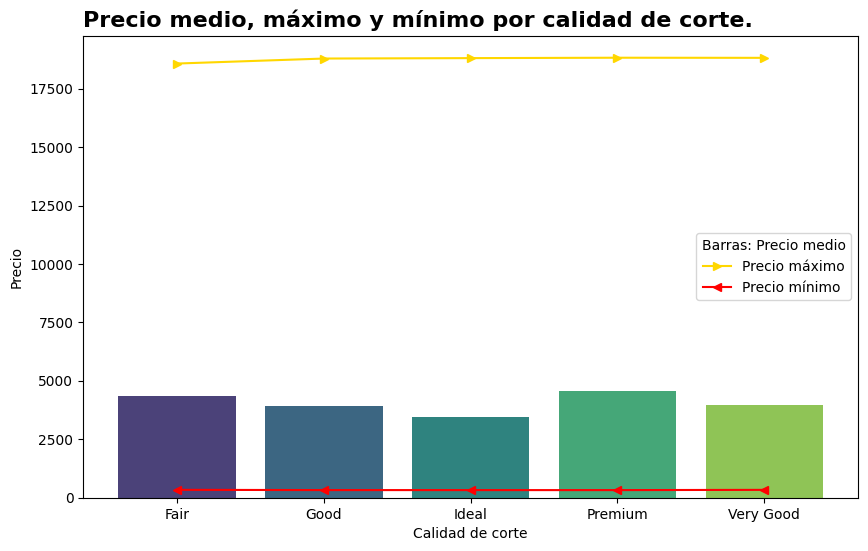

In [47]:
# Visulaizacion de los datos obtenidos en la tabla anterior: Calidad de corte vs precio, agrupando por calidad de corte con el precio máximo, mínimo y media de cada una de las calidades. 
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=cut_mmm, x=('cut', ''), y=('price', 'mean'),hue= 'cut', palette='viridis')
price_max, = plt.plot(cut_mmm[('cut', '')], cut_mmm[('price', 'max')], marker='>', color='gold', label='Precio máximo') #decubro que es necesario poner una coma después de la variable para que se muestre correctamente en la leyenda y no de error
price_min, = plt.plot(cut_mmm[('cut', '')], cut_mmm[('price', 'min')], marker='<', color='red', label='Precio mínimo')
plt.title('Precio medio, máximo y mínimo por calidad de corte.', fontsize=16, fontweight='bold', color='black', loc='left')
plt.ylabel('Precio')
plt.xlabel('Calidad de corte')

plt.legend(handles=[price_max, price_min], loc='center right', title='Barras: Precio medio') #Pongo como título "Barras:Precio medio" para que se entienda mejor la gráfica. Es la única mandera que he encontrado de añadir las barras a la leyenda.

plt.show()


In [48]:
color_mmm= df.groupby('color', as_index =False, observed= True)[['price', 'depth','carat']].agg(['min','max','mean'])
color_mmm

color  price                            depth                       carat  \
           min      max         mean        min        max       mean   min   
0     D  357.0  18693.0  3174.764648  52.200001  71.599998  61.695751  0.20   
1     E  326.0  18731.0  3079.607910  51.000000  79.000000  61.660252  0.20   
2     F  342.0  18791.0  3725.146973  52.299999  71.000000  61.694347  0.20   
3     G  354.0  18818.0  4002.298584  43.000000  72.900002  61.756557  0.23   
4     H  337.0  18803.0  4482.893555  52.700001  71.800003  61.833656  0.23   
5     I  334.0  18823.0  5078.786133  50.799999  71.300003  61.846687  0.23   
6     J  335.0  18710.0  5326.415527  43.000000  73.599998  61.886227  0.23   

                   
    max      mean  
0  3.40  0.658354  
1  3.05  0.657957  
2  3.01  0.736664  
3  3.01  0.771410  
4  4.13  0.911029  
5  4.01  1.024957  
6  5.01  1.162841

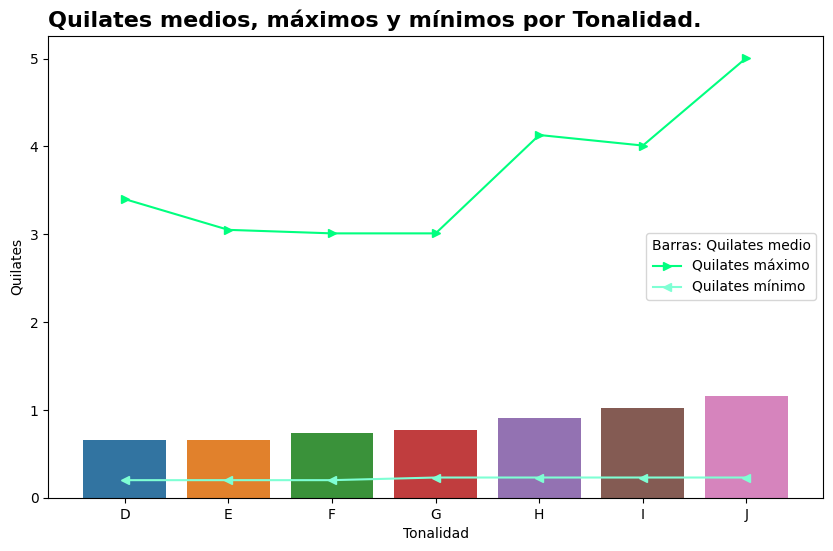

In [49]:
plt.figure(figsize=(10, 6))
barplot = sns.choose_light_palette('color', as_cmap=True)
barplot = sns.barplot(data=color_mmm, x=('color', ''), y=('carat', 'mean'),hue= 'color')
carat_max, = plt.plot(color_mmm[('color', '')], color_mmm[('carat', 'max')], marker='>', color='springgreen', label='Quilates máximo') 
carat_min, = plt.plot(color_mmm[('color', '')], color_mmm[('carat', 'min')], marker='<', color='aquamarine', label='Quilates mínimo')
plt.title('Quilates medios, máximos y mínimos por Tonalidad.', fontsize=16, fontweight='bold', color='black', loc='left')
plt.ylabel('Quilates')
plt.xlabel('Tonalidad')

plt.legend(handles=[carat_max, carat_min], loc='center right', title='Barras: Quilates medio') 
plt.show()

In [50]:
clarity_mmm= df.groupby('clarity', as_index =False, observed = True)[['price','depth','carat']].agg(['min','max','mean'])
clarity_mmm

clarity  price                            depth                       carat  \
             min      max         mean        min        max       mean   min   
0      I1  345.0  18531.0  3925.275635  55.599998  78.199997  62.741623  0.30   
1      IF  369.0  18806.0  2870.569580  52.299999  65.599998  61.509754  0.23   
2     SI1  326.0  18818.0  3995.276611  43.000000  72.900002  61.851250  0.21   
3     SI2  326.0  18804.0  5057.455078  53.099998  72.199997  61.770294  0.20   
4     VS1  327.0  18795.0  3841.367432  50.799999  71.800003  61.666767  0.23   
5     VS2  334.0  18823.0  3927.330322  43.000000  79.000000  61.722237  0.20   
6    VVS1  336.0  18777.0  2526.603027  54.000000  67.599998  61.624268  0.23   
7    VVS2  336.0  18768.0  3286.532471  51.000000  67.599998  61.663551  0.23   

                   
    max      mean  
0  5.01  1.283527  
1  2.29  0.505645  
2  2.57  0.850458  
3  3.04  1.076402  
4  2.59  0.727403  
5  3.51  0.764256  
6  2.31  0.503696  
7  2.07  0.596527

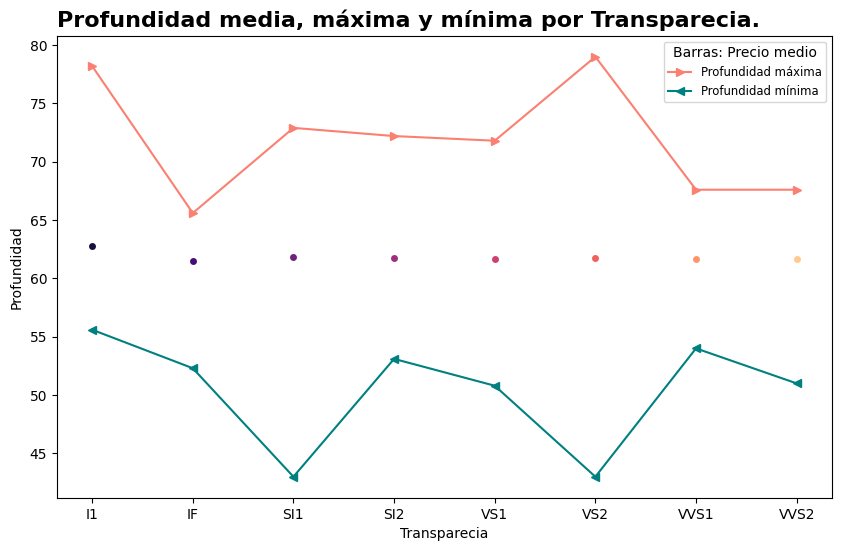

In [51]:
plt.figure(figsize=(10, 6))
barplot = sns.swarmplot(data=clarity_mmm, x=('clarity', ''), y=('depth', 'mean'), hue='clarity', palette='magma')
depth_max, = plt.plot(clarity_mmm[('clarity', '')], clarity_mmm[('depth', 'max')], marker='>', color='salmon', label='Profundidad máxima') #decubro que es necesario poner una coma después de la variable para que se muestre correctamente en la leyenda y no de error
depth_min, = plt.plot(clarity_mmm[('clarity', '')], clarity_mmm[('depth', 'min')], marker='<', color='teal', label='Profundidad mínima')
plt.title('Profundidad media, máxima y mínima por Transparecia.', fontsize=16, fontweight='bold', color='black', loc='left')
plt.ylabel('Profundidad')
plt.xlabel('Transparecia')

plt.legend(handles=[depth_max, depth_min], loc='upper right', fontsize='small', title='Barras: Precio medio') #Pongo como título "Barras:Precio medio" para que se entienda mejor la gráfica. Es la única mandera que he encontrado de añadir las barras a la leyenda.

plt.show()

### 3 Distribuciones

##### a.-Outliers: Visualización Q1 y Q3 y calcular límites tukey y filtrar. Sobre la columna precio.

In [52]:
Q1= df['price'].quantile(0.25)
Q3= df['price'].quantile(0.75)
IQR= Q3 - Q1
print(f"El valor IQR es: {IQR:.0f}")


El valor IQR es: 4374


In [53]:
infer_limit= Q1 - 1.5 * IQR
super_limit= Q3 + 1.5 * IQR

In [54]:
filtro= (df['price'] < infer_limit) | (df['price'] > super_limit)
df_sin_outliers= df[filtro]

In [55]:
px.violin(df, y='price', box=True, title='Violín plot de precios con outliers', width=600, height=400)

In [56]:
px.violin(df_sin_outliers, y='price',title='Violín plot de precios con outliers', box=True, width=600, height=400)

##### b.- Obtener asimetría, curtosis y transformar datos con logaritmo o raíz cuadrada,aplicar sobre precio, visualizar el histograma y/o boxplot por tipo de corte. 
Opcional ajustar la escala. ✅


In [57]:
# asimetria
df['price'].skew()

print (f"La asimetría de la columna Precio es: {df['price'].skew():.4f}")

La asimetría de la columna Precio es: 1.6183


In [58]:
# curtosis
df['price'].kurt()

print (f"La curtosis de la columna Precio es: {df['price'].kurt():.4f}")

La curtosis de la columna Precio es: 2.1787


In [59]:
# Transformación logarítmica de la columna 'price' con logritmo. 
# Ya que no hay un función específica en pandas para aplicar el logaritmo a la columna, 
# se hace a traves de la función de Numpy (np.log) y el método apply sobre la columna 'price'.
df ['price_l']= df['price'].apply(np.log)   
df['price_l']
 

0        5.786897
1        5.786897
2        5.789960
3        5.811141
4        5.814130
           ...   
53935    7.921898
53936    7.921898
53937    7.921898
53938    7.921898
53939    7.921898
Name: price_l, Length: 53794, dtype: float32

In [60]:
# Transofrmación con raíz cuadrada. Igual que en el caso anterior.
df['price_rq']= df['price'].apply(np.sqrt)
df['price_rq']

0        18.055470
1        18.055470
2        18.083141
3        18.275667
4        18.303005
           ...    
53935    52.507141
53936    52.507141
53937    52.507141
53938    52.507141
53939    52.507141
Name: price_rq, Length: 53794, dtype: float32

In [61]:
px.box(df, y='price', title='Boxplot de precios', width=600, height=400)

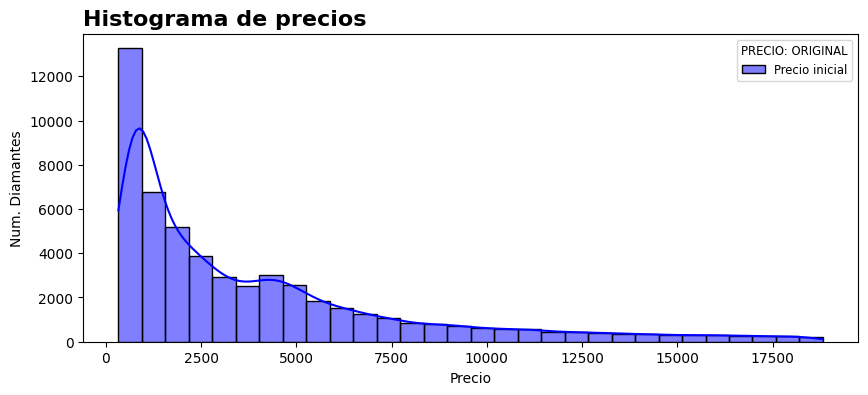

In [62]:
#visualización e histograma del precio original.
plt.figure(figsize=(10, 4))
sns.histplot(df['price'], kde=True, color='blue', bins=30, label='Precio inicial')
plt.title('Histograma de precios', fontsize=16, fontweight='bold', color='black', loc='left')
plt.xlabel('Precio')
plt.ylabel('Num. Diamantes')
plt.legend(title='PRECIO: ORIGINAL', loc='upper right',  shadow=False, fontsize='small', title_fontsize='small');



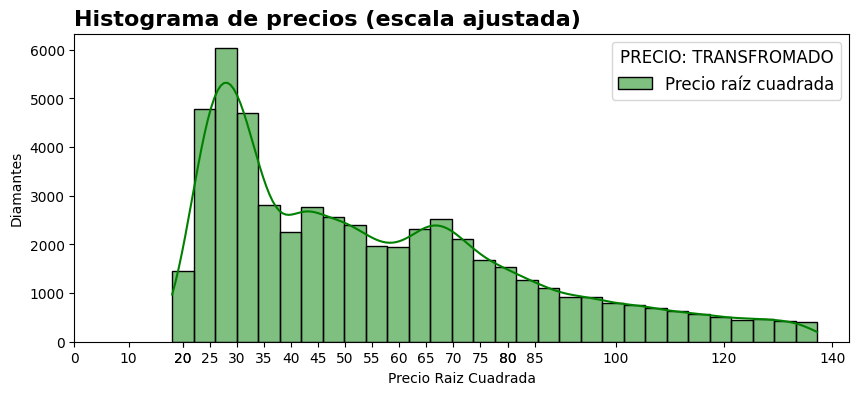

In [63]:
# Visualización e histograma del precio transformado con raíz cuadrada. Ajustamos la escala en las zonas con más datos.
plt.figure(figsize=(10, 4))
sns.histplot(df['price_rq'], kde=True, color='green', bins=30, label='Precio raíz cuadrada')
plt.title('Histograma de precios (escala ajustada)', fontsize=16, fontweight='bold', color='black', loc='left')
plt.xlabel('Precio Raiz Cuadrada')
plt.ylabel('Diamantes')
ticks_bajos = range(0, 30, 10)
ticks_medios = range(20, 90, 5)
ticks_altos = range(80, 150, 20)
ticks = np.concatenate([ticks_bajos, ticks_medios, ticks_altos])
plt.xticks(ticks)  
plt.legend(title='PRECIO: TRANSFROMADO', loc='upper right', shadow=False, fontsize='large', title_fontsize='large');



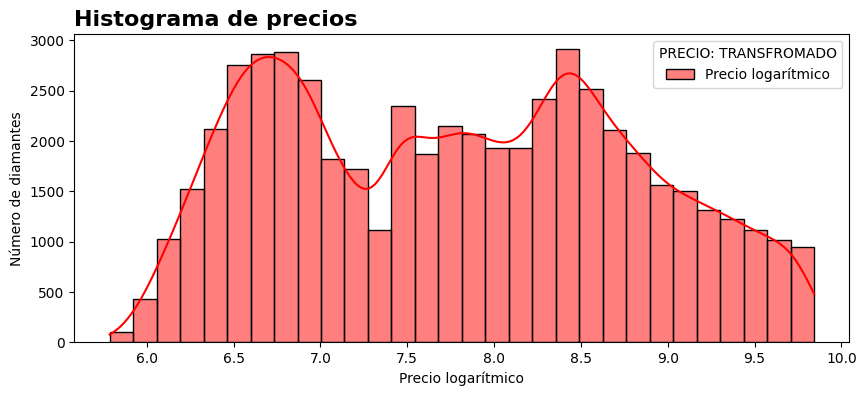

In [64]:
# Visualización e histograma del precio transformado con logaritmo.
plt.figure(figsize=(10, 4))
sns.histplot(df['price_l'], kde=True, color='red', bins=30, label='Precio logarítmico')
plt.title('Histograma de precios', fontsize=16, fontweight='bold', color='black', loc='left')
plt.legend(title='PRECIO: TRANSFROMADO', loc='upper right', shadow=False, fontsize='medium', title_fontsize='medium')
plt.xlabel('Precio logarítmico')
plt.ylabel('Número de diamantes');

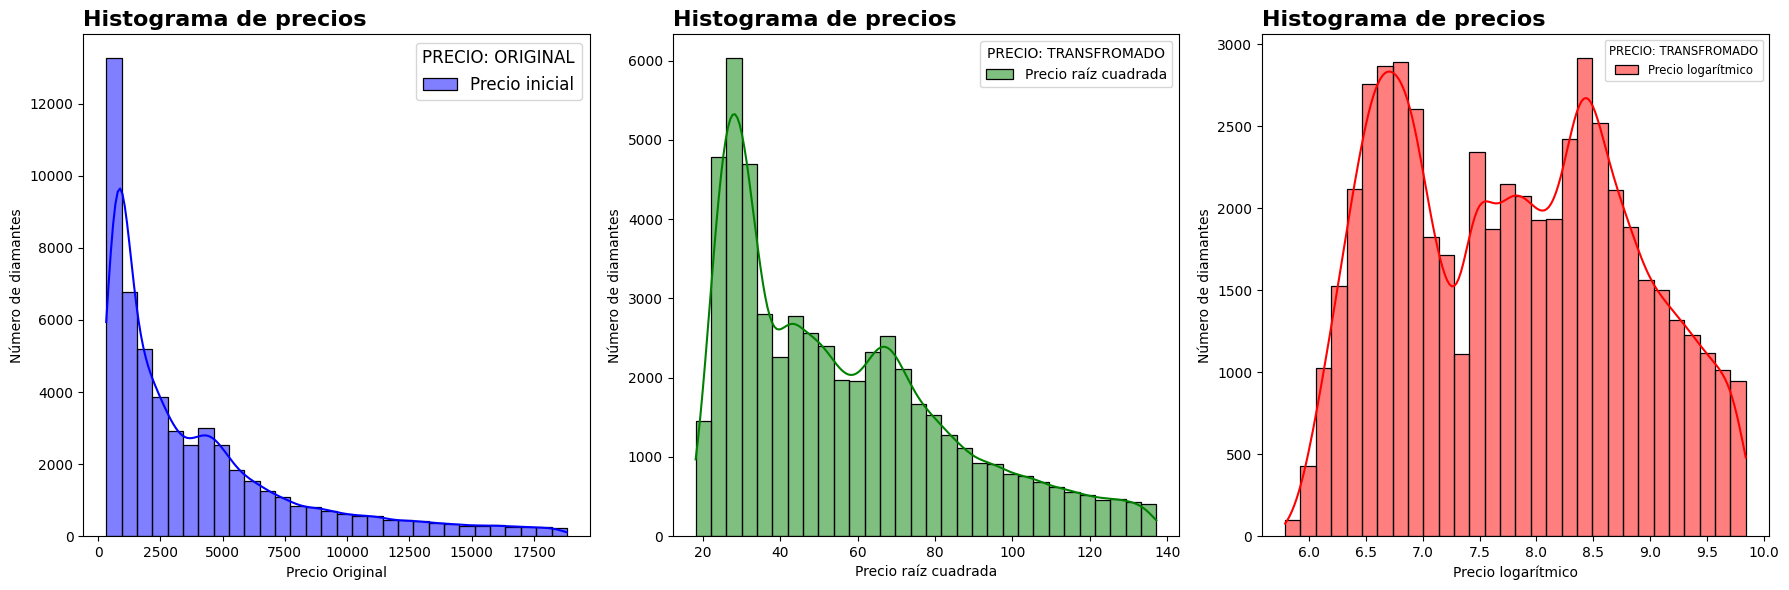

In [65]:
#Comparación de los tres histogramas en subplots

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['price'], kde=True, color='blue', bins=30, label='Precio inicial')
plt.title('Histograma de precios', fontsize=16, fontweight='bold', color='black', loc='left')
plt.legend(title='PRECIO: ORIGINAL', loc='upper right', shadow=False, fontsize='large', title_fontsize='large')
plt.xlabel('Precio Original')
plt.ylabel('Número de diamantes')

plt.subplot(1, 3, 2)
sns.histplot(df['price_rq'], kde=True, color='green', bins=30, label='Precio raíz cuadrada')
plt.title('Histograma de precios', fontsize=16, fontweight='bold', color='black', loc='left')
plt.legend(title='PRECIO: TRANSFROMADO', loc='upper right', shadow=False, fontsize='medium', title_fontsize='medium')
plt.xlabel('Precio raíz cuadrada')
plt.ylabel('Número de diamantes')

plt.subplot(1, 3, 3)
sns.histplot(df['price_l'], kde=True, color='red', bins=30, label='Precio logarítmico')
plt.title('Histograma de precios', fontsize=16, fontweight='bold', color='black', loc='left')
plt.legend(title='PRECIO: TRANSFROMADO', loc='upper right', shadow=False, fontsize='small', title_fontsize='small')
plt.xlabel('Precio logarítmico')
plt.ylabel('Número de diamantes')
plt.tight_layout()
plt.show()

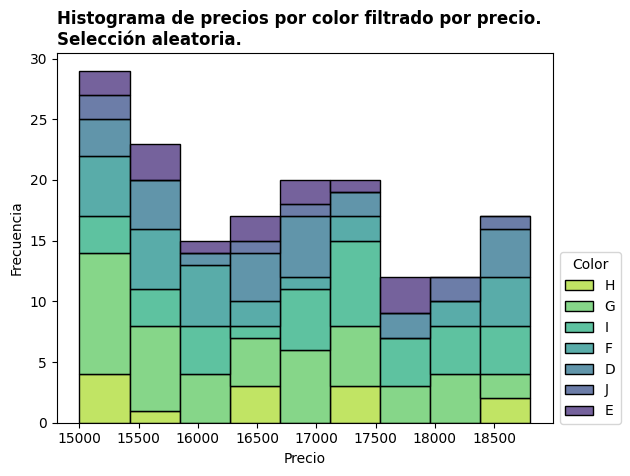

In [66]:

filtro_d = df[df['price'] >= 15000]
sample_d = filtro_d.sample(frac=0.1, random_state=22)
sns.histplot(data=sample_d, x='price', hue='color', multiple='stack', palette='viridis')
plt.title('Histograma de precios por color filtrado por precio. \nSelección aleatoria.', fontsize=12, fontweight='bold', color='black', loc='left')
plt.ylabel('Frecuencia')
plt.xlabel('Precio')
plt.legend(title='Color', labels=sample_d['color'].unique(), bbox_to_anchor=(1, 0.48), loc='upper left')
plt.show()

##### c.- Discretizar la columna precio por barato, medio, caro usando la función pd.cut

In [67]:
bins = [0, 5000, 15000, float('inf')]
labels = ['Barato', 'Medio', 'Caro']
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)
print(df[['price', 'price_category']])



        price price_category
0       326.0         Barato
1       326.0         Barato
2       327.0         Barato
3       334.0         Barato
4       335.0         Barato
...       ...            ...
53935  2757.0         Barato
53936  2757.0         Barato
53937  2757.0         Barato
53938  2757.0         Barato
53939  2757.0         Barato

[53794 rows x 2 columns]


In [68]:
price_category = df.groupby('price_category', observed= False).size()
print(price_category)


price_category
Barato    39105
Medio     13042
Caro       1647
dtype: int64


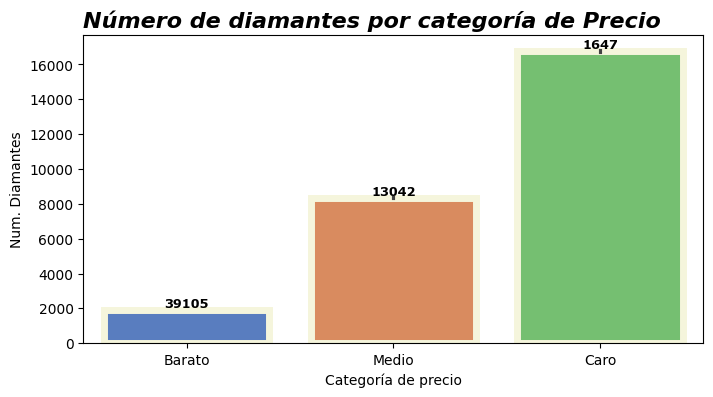

In [69]:
plt.figure(figsize=(8, 4))
num_x = sns.barplot(data=df, x='price_category', y='price', hue='price_category', palette='muted', edgecolor='beige', linewidth=5)
for bar, count in zip(num_x.patches, price_category):
    num_x.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height() +1,           
        f'{count}',                       
        ha='center', va= 'bottom' ,                   
        fontsize=9 , fontweight= 'bold', color= 'black', font= 'Verdana') 
plt.title('Número de diamantes por categoría de Precio', fontsize=16, fontweight='bold',style= 'oblique', color='black', loc='left')
plt.ylabel('Num. Diamantes')
plt.xlabel('Categoría de precio');

### 4 Visualizaciones
Seaborn EDAS:
    * univariantes:
        * histogramas y curvas de densidad
        * boxplot
        * countplot
    * bivariantes y multivariantes
        * scatterplot con hue, con size, con style
        * Calcular correlación con Pandas y mostrarla con seaborn
        * Hacer la correlación en un gráfico de barras para la columna 'price'
        * Crear una pivot table usando como index y columns algunas variables categóricas y como values usar el price y visualizarla con heatmap de seaborn
    * Combinarlas con:
        * hue, style, size, row, col usando un relplot
        * filtro

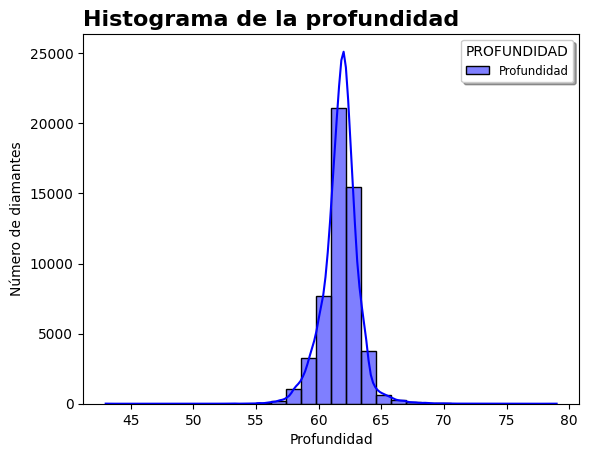

In [70]:
#Histograma.

sns.histplot(df['depth'], kde=True, color='blue', bins=30, label='Profundidad')
plt.title('Histograma de la profundidad', fontsize=16, fontweight='bold', color='black', loc='left')
plt.xlabel('Profundidad')
plt.ylabel('Número de diamantes')
plt.legend(title='PROFUNDIDAD', loc='upper right', shadow= True, fontsize='small');
 

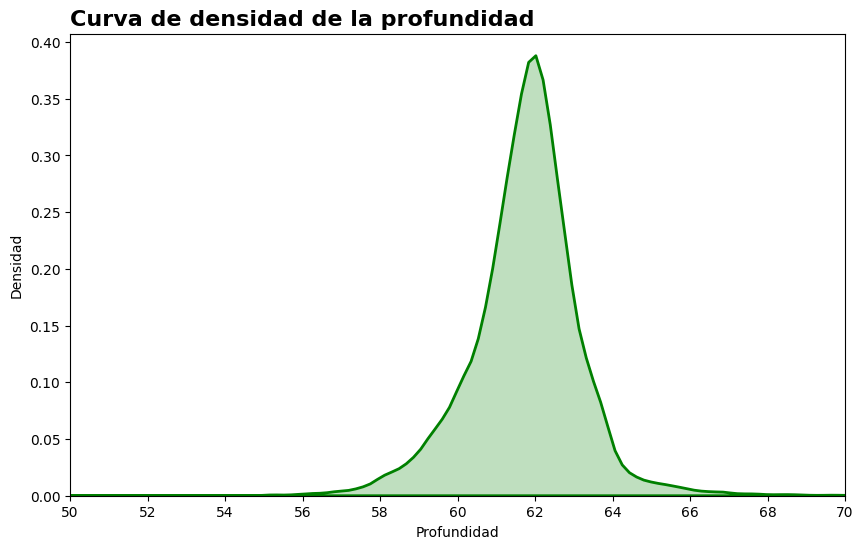

In [71]:
# Curva de densidad de la profundidad, con tos ticks X ajustados a los datos existentes.
plt.figure(figsize=(10, 6))
sns.kdeplot(df['depth'], color='green', fill=True, label='Profundidad', linewidth=2)
plt.title('Curva de densidad de la profundidad', fontsize=16, fontweight='bold', color='black', loc='left')
ticks = range(50, 71, 2)
plt.xticks(ticks)
plt.xlim(min(ticks), max(ticks))
plt.xlabel('Profundidad')
plt.ylabel('Densidad');


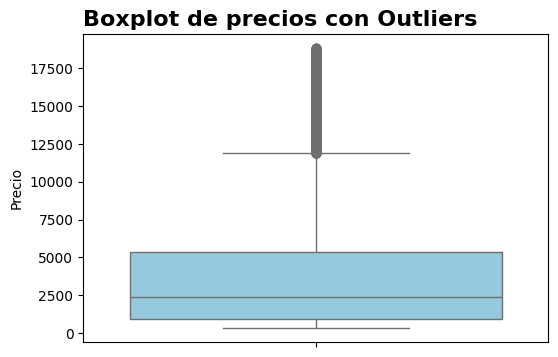

In [72]:
# Univariante
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['price'], color='skyblue')
plt.title('Boxplot de precios con Outliers', fontsize=16, fontweight='bold', color='black', loc='left')
plt.ylabel('Precio')
plt.show()

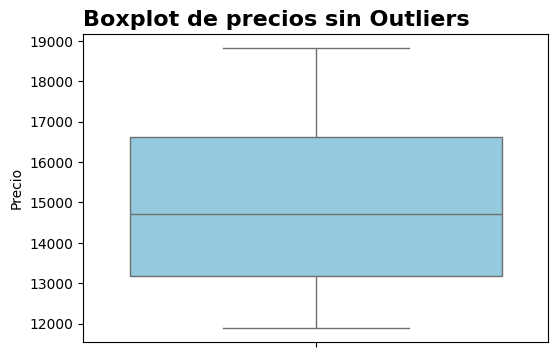

In [73]:
# Univariante

plt.figure(figsize=(6, 4))
sns.boxplot(y=df_sin_outliers['price'], color='skyblue')
plt.title('Boxplot de precios sin Outliers', fontsize=16, fontweight='bold', color='black', loc='left')
plt.ylabel('Precio')
plt.show()

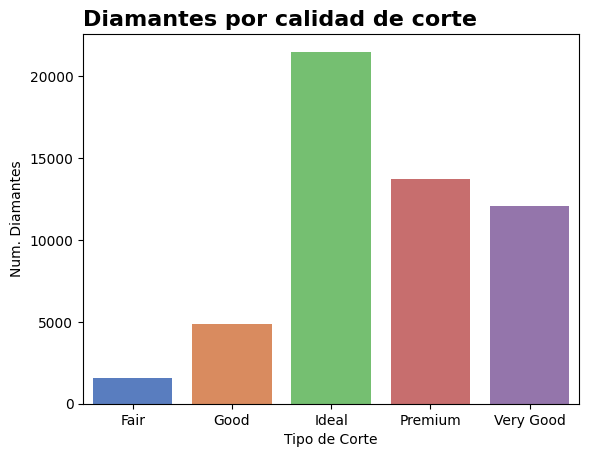

In [88]:
# Bivariante

sns.countplot(data=df, x='cut', hue= 'cut' , palette='muted')  
plt.title('Diamantes por calidad de corte', fontsize=16, fontweight='bold', color='black', loc='left',)
plt.xlabel('Tipo de Corte')
plt.ylabel('Num. Diamantes')
plt.show()

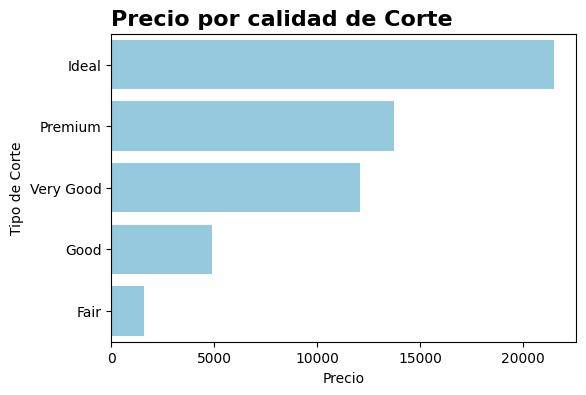

In [ ]:
# Bivariante ORDENADO

plt.figure(figsize=(6, 4))
sns.countplot(y=df['cut'], color='skyblue', order=df['cut'].value_counts().index)
plt.title('Precio por calidad de Corte', fontsize=16, fontweight='bold', color='black', loc='left')
plt.ylabel('Tipo de Corte')
plt.xlabel('Precio')
plt.show()

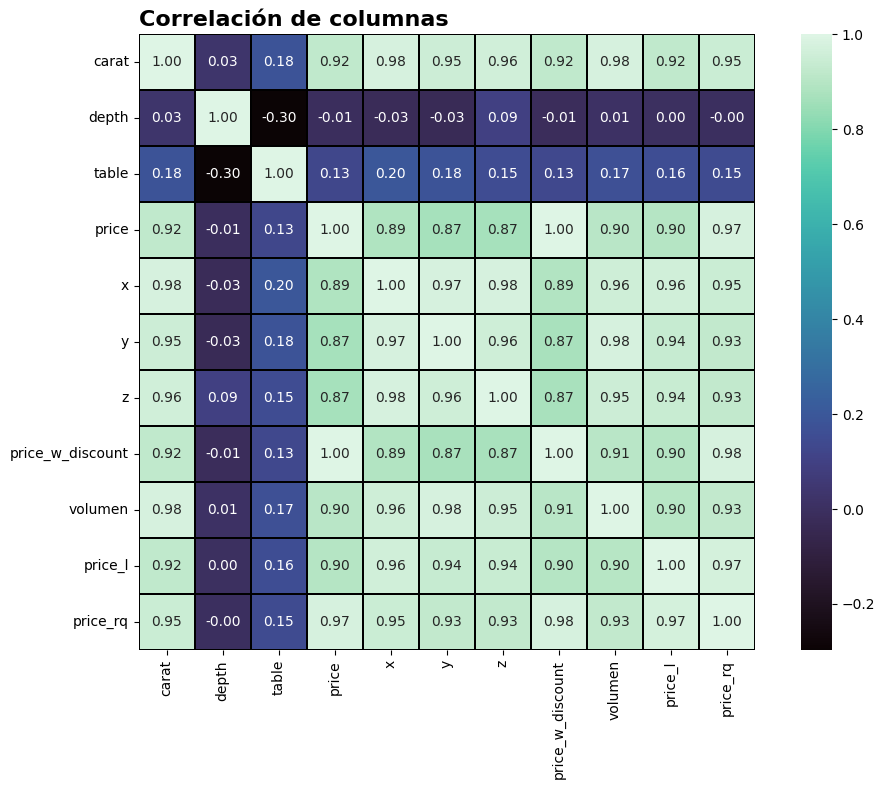

In [76]:
# Correlaciones
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='mako', fmt='.2f', linewidths=0.1, linecolor='black', square=True,)
plt.title('Correlación de columnas', fontsize=16, fontweight='bold', color='black', loc='left')
plt.show()

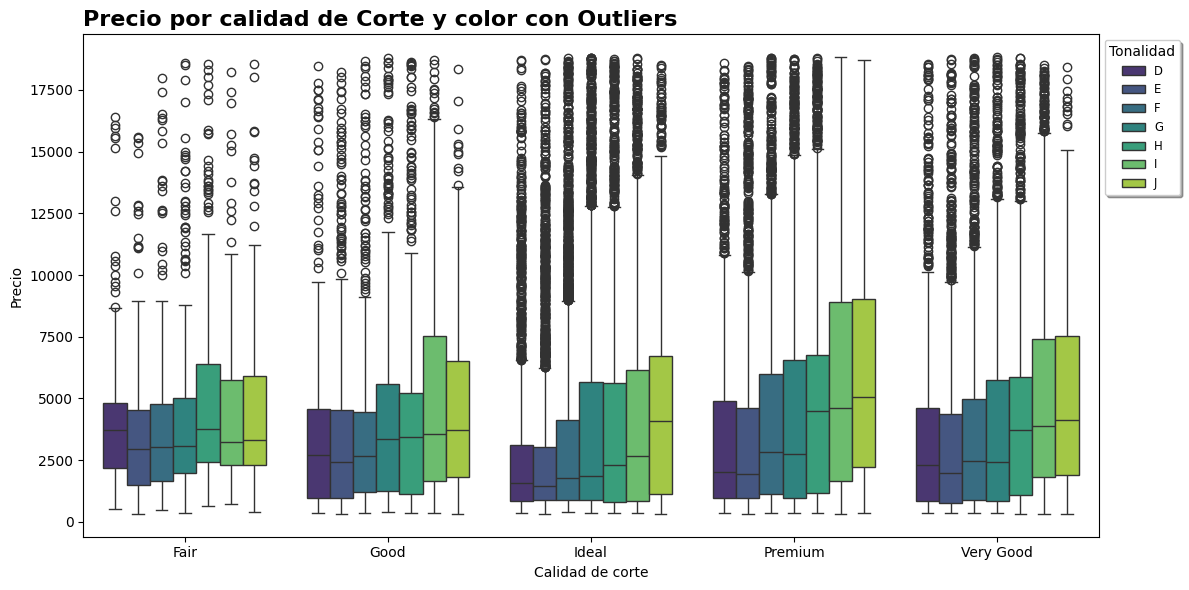

In [77]:
# Multivariante

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='cut', y='price', hue='color', palette='viridis')
plt.title('Precio por calidad de Corte y color con Outliers', fontsize=16, fontweight='bold', color='black', loc='left')
plt.ylabel('Precio')
plt.xlabel('Calidad de corte')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Tonalidad", title_fontsize='medium', shadow=True, fontsize='small')
plt.tight_layout()
plt.show();


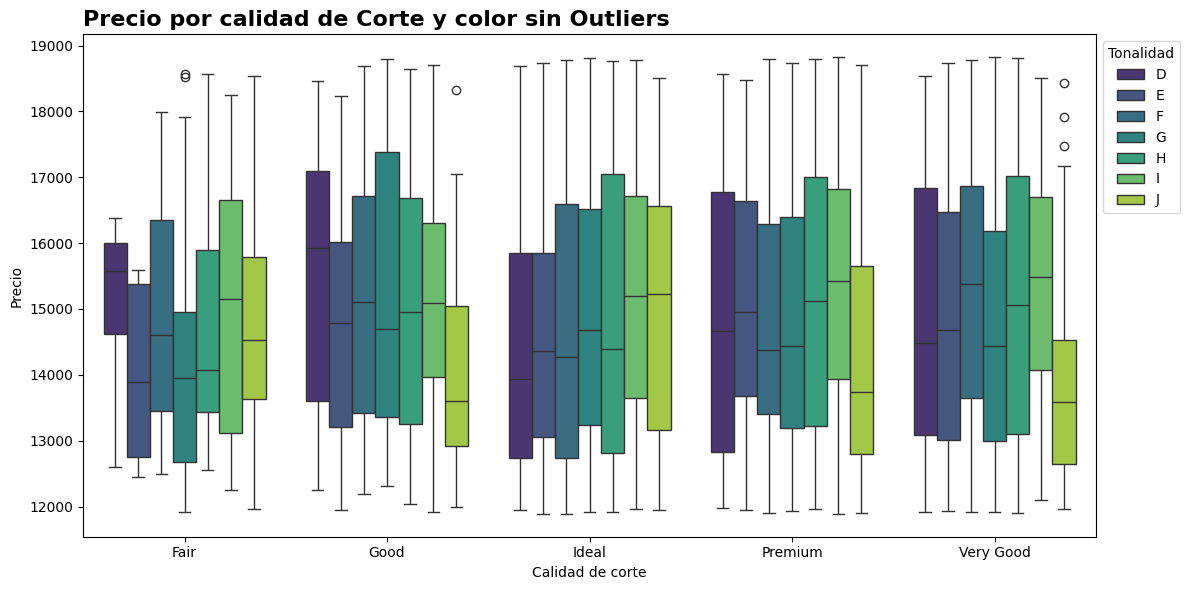

In [78]:
# Multivariante

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_sin_outliers, x='cut', y='price', hue='color', palette='viridis')
plt.title('Precio por calidad de Corte y color sin Outliers', fontsize=16, fontweight='bold', color='black', loc='left')
plt.ylabel('Precio')
plt.xlabel('Calidad de corte')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Tonalidad")
plt.tight_layout()
plt.show();

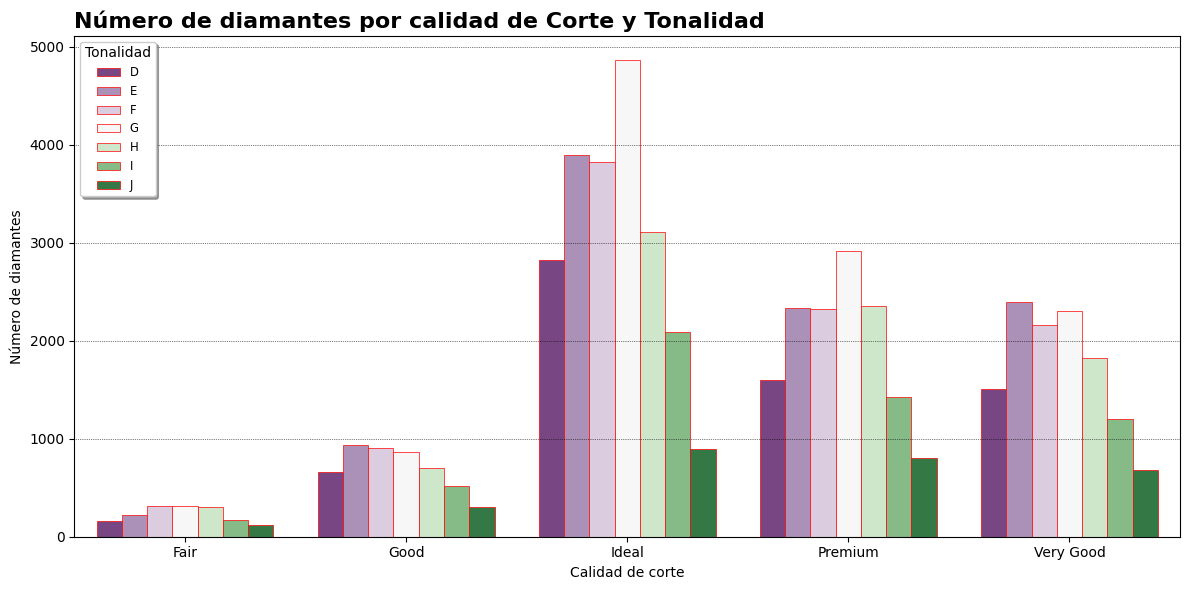

In [79]:
# Multivariante

plt.figure(figsize=(12, 6)) 
sns.countplot(data=df, x='cut', hue='color', palette='PRGn', edgecolor='red', linewidth=0.5)  
plt.title('Número de diamantes por calidad de Corte y Tonalidad', fontsize=16, fontweight='bold', color='black', loc='left')
plt.ylabel('Número de diamantes')
plt.xlabel('Calidad de corte')
plt.legend(title='Tonalidad', loc='upper left', shadow=True, fontsize='small')
plt.grid(axis='y', linestyle=':', linewidth=0.5, color='black')  
plt.tight_layout()
plt.show();

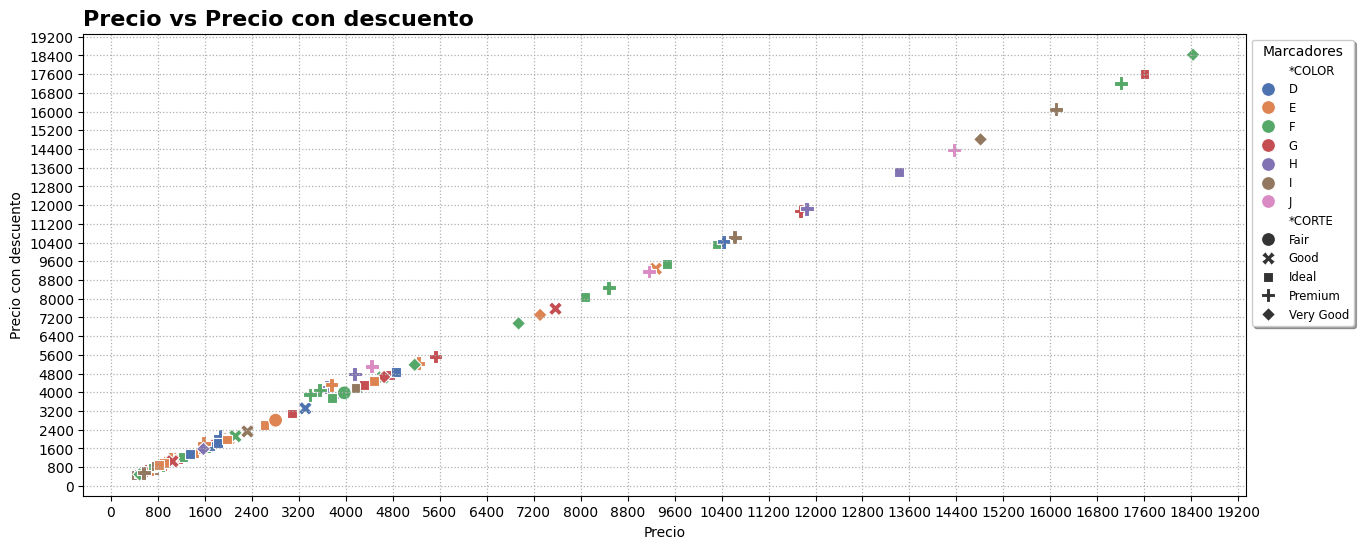

In [80]:
from matplotlib.ticker import MaxNLocator  # Importamos el módulo MaxNLocator para ajustar los ticks y ajustar las cuadrículas del grid a través de 'n_bins', las quería más pequeñas.
# Multivariante
sample = df.sample(100)
plt.figure(figsize=(15, 6))
sns.scatterplot(data=sample, x='price', y='price_w_discount', style='cut', hue='color', palette='deep', 
     markers=True, style_order=None, s= 100)
legend =plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Marcadores", title_fontsize='medium', shadow=True, fontsize='small')
for text in legend.get_texts():
    if text.get_text() == 'color':
        text.set_text('*COLOR')
    elif text.get_text() == 'cut':
        text.set_text('*CORTE')
plt.title('Precio vs Precio con descuento', fontsize=16, fontweight='bold', color='black', loc='left')
plt.xlabel('Precio')
plt.ylabel('Precio con descuento')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, prune='lower', nbins=30))  
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True, prune='lower', nbins=30))  
plt.grid(visible=True, which='major', linestyle=':', linewidth=0.9)

plt.show();

In [81]:
# Multivariante px
df_sampled= df.sample(100)
fig = px.scatter(df_sampled, x='carat', y='price', color='cut', size='carat', hover_name='cut', title='Precio vs Quilates', width=1200, height=500, labels={'carat': 'Quilates', 'price': 'Precio'}, template='simple_white', opacity=0.7, color_discrete_map={'Fair': 'red', 'Good': 'blue', 'Very Good': 'green', 'Premium': 'orange', 'Ideal': 'purple'}, size_max=9)
fig.update_layout(
	title={'text': 'Precio vs Quilates, por Calidad de Corte', 'font': {'size': 20, 'color': 'black', 'weight':'bold'}, 'x': 0.10, 'y': 0.89},
	xaxis_title={'text': 'Quilates', 'font': {'size': 16, 'color': 'red', 'weight':'bold'}},
	yaxis_title={'text': 'Precio', 'font': {'size': 16, 'color': 'red', 'weight':'bold'}},
	legend_title={'text': 'Calidad de corte', 'font': {'size': 14, 'color': 'blue', 'weight':'bold'}},
	legend=dict(font=dict(size=12), traceorder='reversed+grouped')
)
fig.show()

In [82]:
# Multivariante 3d px
df_sampled = df_sin_outliers.sample(1000)
fig = px.scatter_3d(df_sampled, x='carat', y='price', z='volumen', color='cut', width=900, height=800, opacity=0.7, 
    size='volumen', hover_name='cut', symbol='cut', symbol_map={'Ideal': 'circle', 'Premium': 'square', 'Very Good': 'diamond', 'Good': 'cross', 'Fair': 'x'})

fig.update_layout(title={'text': 'Relación entre Quilates, Precio y Volumen por Calidad de Corte', 'font': {'size':18, 'color': 'salmon', 'weight':'bold'  }, 'x': 0.10, 'y': 0.89 },
    scene=dict(
        xaxis_title={'text': 'Quilates', 'font': {'size': 16, 'color': 'gold', 'weight':'bold' }},
        yaxis_title={'text': 'Precio', 'font': {'size': 16, 'color': 'gold', 'weight':'bold' }},
        zaxis_title={'text': 'Volumen', 'font': {'size': 16, 'color': 'gold', 'weight':'bold' }}
    ),
    legend_title={'text': 'Calidad de corte', 'font': {'size': 12, 'color': 'green', 'weight':'bold' }}, 
    legend=dict(font=dict(size=12), traceorder='normal'),)
fig.show()

In [83]:
# Multivariante densidad , con gráficas marginales, histograma y caja.

fig = px.density_contour(df_dummies_map, x="price", y="cut", z="color_F", color="color_F", marginal_x="histogram", marginal_y="box", 
    title='Densidad y Caja de Precio por Corte el color_F con respecto al resto de colores', width=1200, height=600, 
    labels={'price': 'Precio', 'cut': 'Corte', 'color_F': 'Color F'})
fig.show()

NameError: name 'df_dummies_map' is not defined

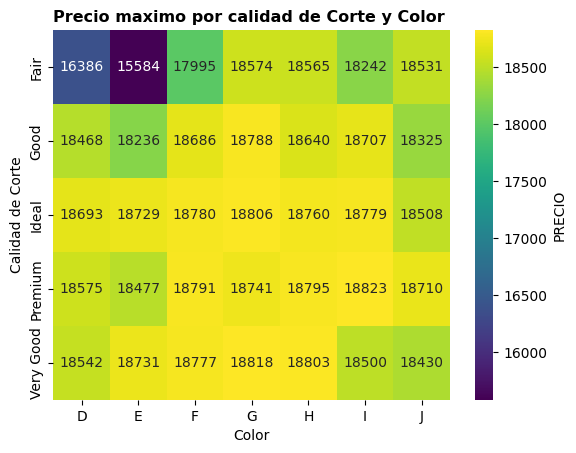

In [ ]:
# Tabla pivote con el precio máximo por calidad de corte y color.
pivot_table = df.pivot_table(index='cut', columns='color', values='price', aggfunc='max', observed=True)
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='.0f', cbar_kws={'label': 'PRECIO'})
plt.title('Precio maximo por calidad de Corte y Color', fontsize=11.5, fontweight='bold', color='black', loc='left')
plt.ylabel('Calidad de Corte')
plt.xlabel('Color')
plt.show()

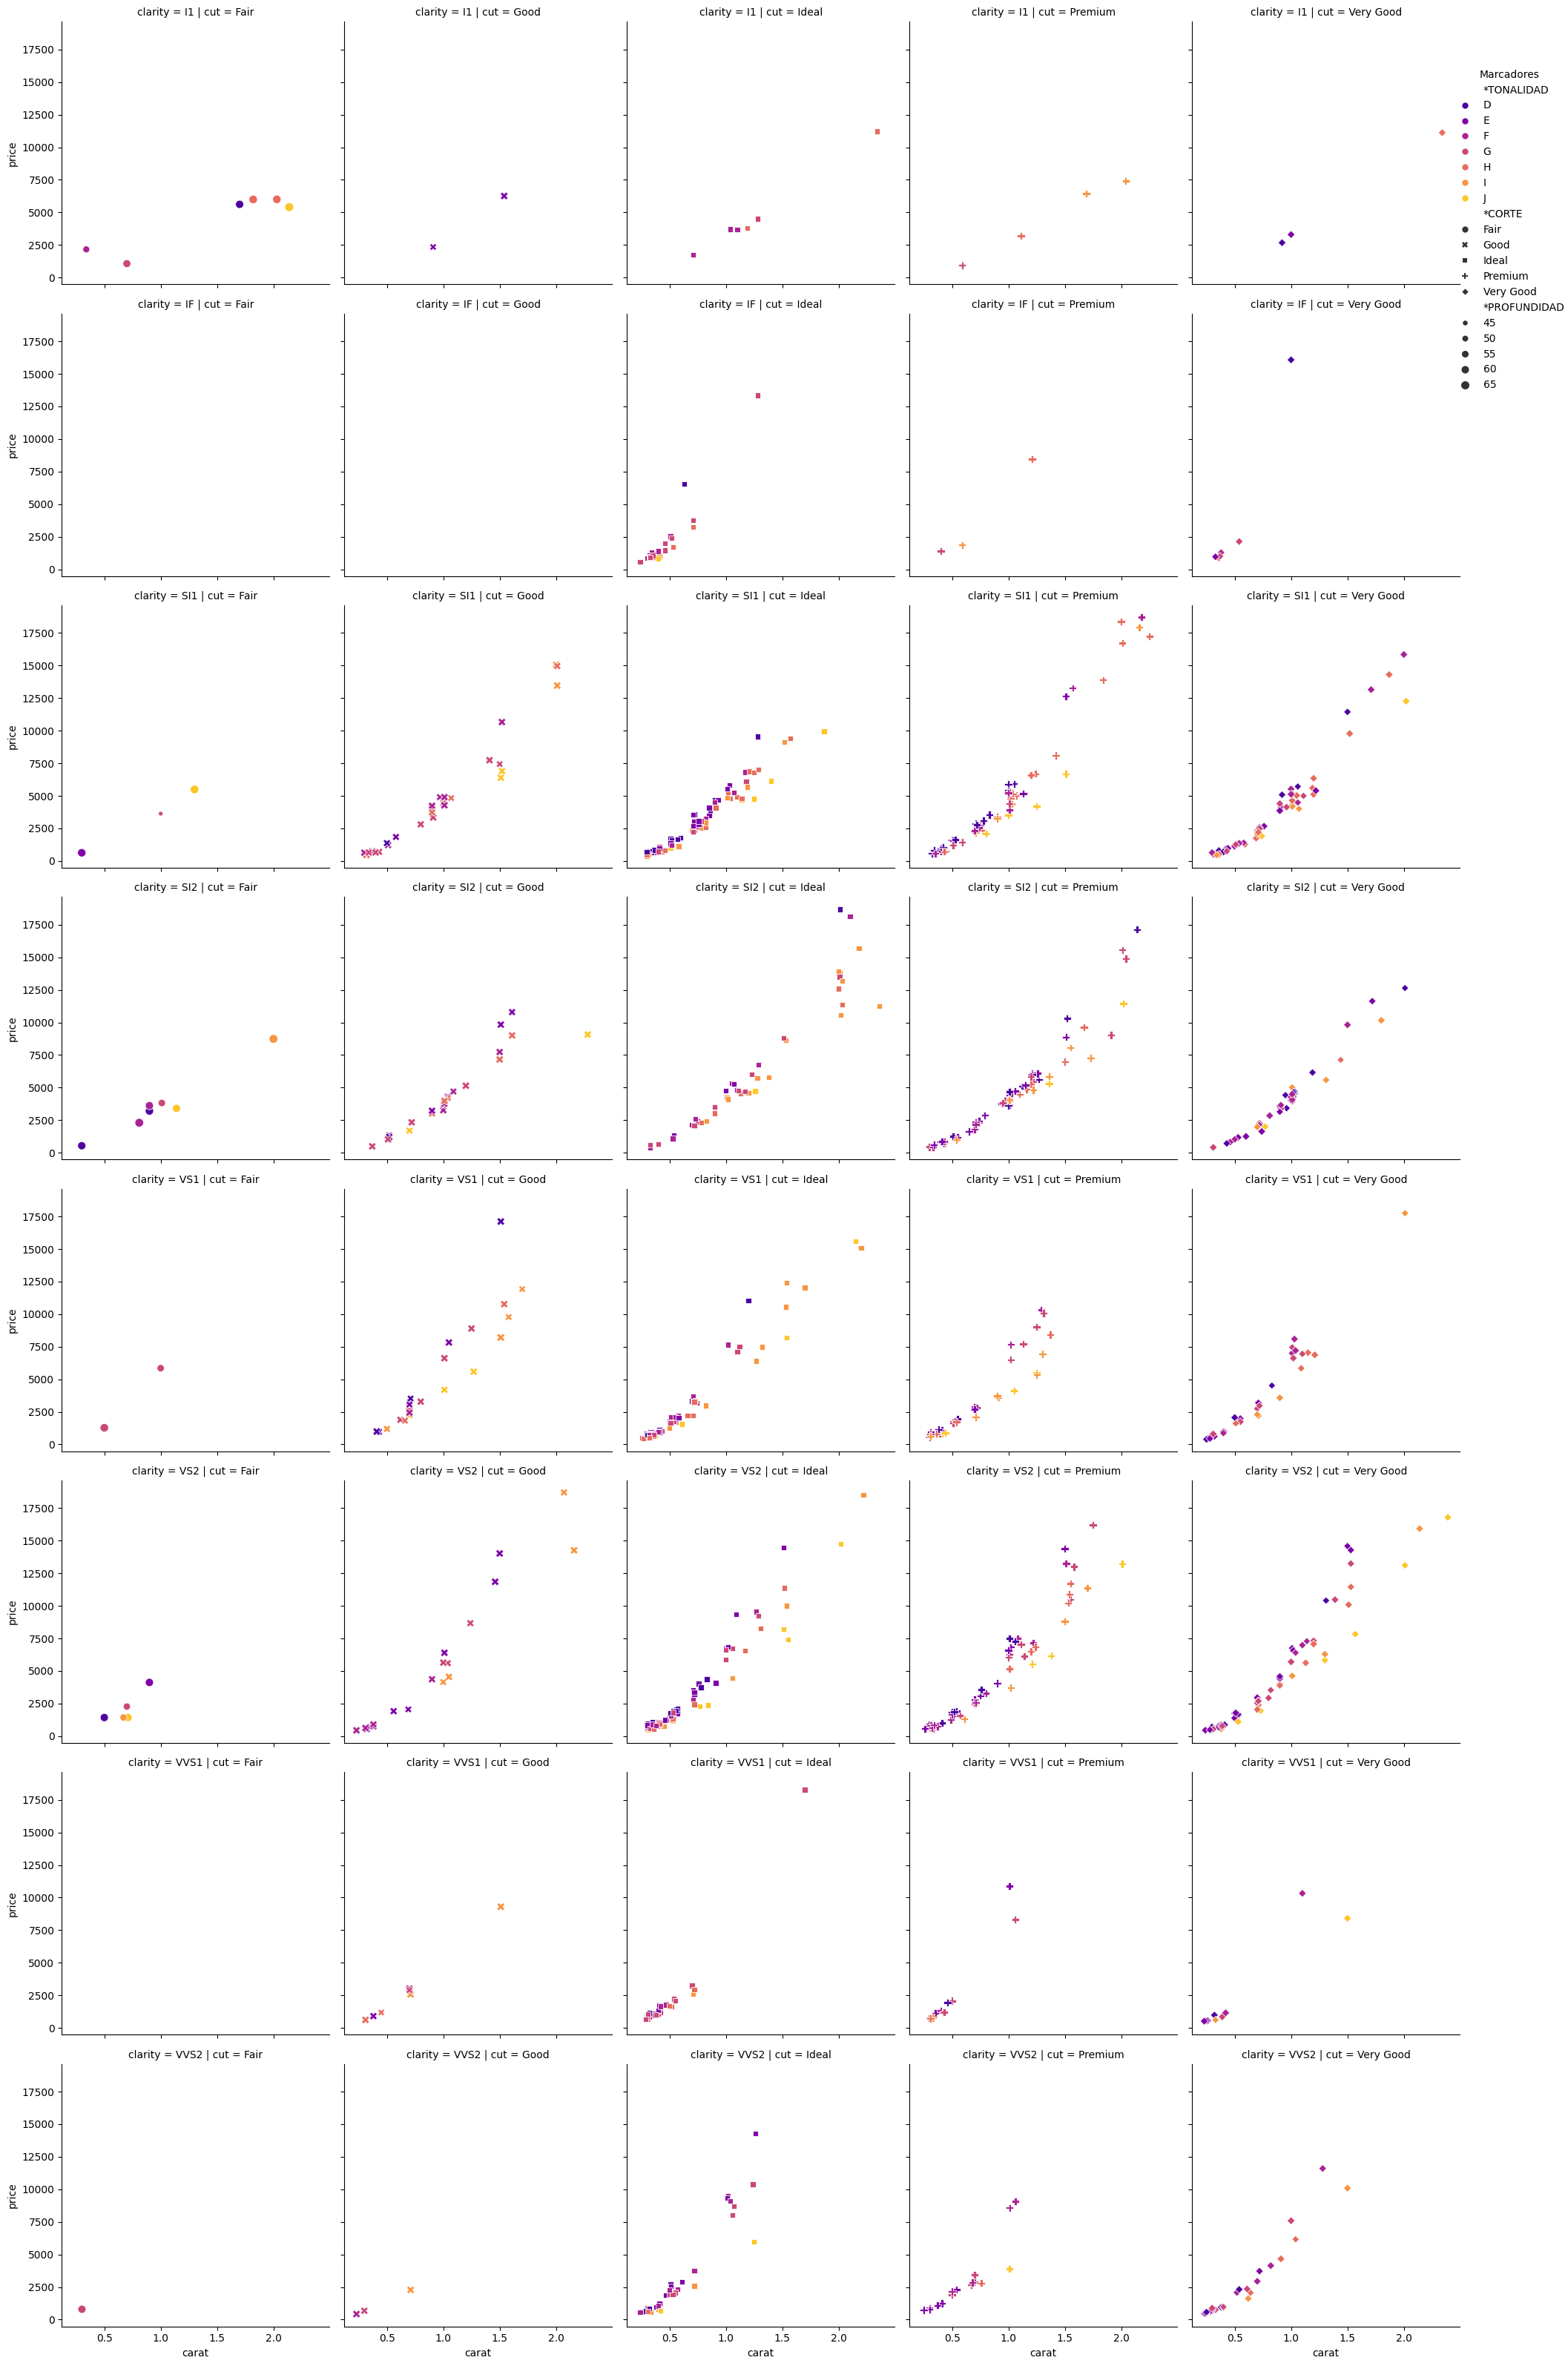

In [ ]:
# REplot de gráfica de dispersión.

relplot = sns.relplot(
    data=df.sample(1000, random_state=42),
    x='carat',
    y='price',
    hue='color',
    style='cut',
    size='depth',
    col='cut',
    row='clarity',
    palette='plasma',
    height=4,
    aspect=1,)
relplot.legend.set_bbox_to_anchor((1.00, 0.9))  
relplot.legend.set_title("Marcadores")
for text in relplot.legend.get_texts():
    if text.get_text() == 'color':
        text.set_text('*TONALIDAD')
    elif text.get_text() == 'cut':
        text.set_text('*CORTE')  
    elif text.get_text() == 'depth':
        text.set_text('*PROFUNDIDAD')  
plt.show()

In [85]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_iva,price_w_discount,volumen,price_l,price_rq,price_category
0,0.23,Ideal,E,SI2,61.500000,55.0,326.0,3.95,3.98,2.43,394.46,358.6,38.202034,5.786897,18.055470,Barato
1,0.21,Premium,E,SI1,59.799999,61.0,326.0,3.89,3.84,2.31,394.46,326.0,34.505856,5.786897,18.055470,Barato
2,0.23,Good,E,VS1,56.900002,65.0,327.0,4.05,4.07,2.31,395.67,327.0,38.076889,5.789960,18.083141,Barato
3,0.29,Premium,I,VS2,62.400002,58.0,334.0,4.20,4.23,2.63,404.14,334.0,46.724579,5.811141,18.275667,Barato
4,0.31,Good,J,SI2,63.299999,58.0,335.0,4.34,4.35,2.75,405.35,335.0,51.917248,5.814130,18.303005,Barato


In [86]:
#Guardamos el DF en un archivo csv.
df.to_csv('diamonds_tras_ejercicio.csv', index=False)